In [ ]:
import sys
sys.path.append("..\..")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import auc, roc_curve
from sklearn.tree import DecisionTreeClassifier

from src.data.datasets.overlaps import OverlapsDataset

In [2]:
dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet")

df = pd.DataFrame(
    np.concatenate([dataset.features, dataset.targets.reshape(-1, 1)], axis=1), 
    columns=dataset.feature_names + ['is_overlapping']
)
df

Extracting non-overlapping features: 100%|██████████| 1350/1350 [00:37<00:00, 35.99it/s]


,levenshtein_distance,match_len1,match_len2,match_ratio1,match_ratio2,note_C,note_C♯,note_D,note_D♯,note_E,...,interval_6,interval_7,interval_8,interval_9,interval_10,interval_lt,interval_gt,interval_to_rest,interval_from_rest,is_overlapping
0,0.152603,-0.414819,-0.418182,-0.453665,-0.454937,-0.526575,-0.721898,-0.347170,-0.684230,-0.862267,...,-0.407211,-0.058594,-0.383446,-0.309683,-0.282732,-0.491971,-0.313501,-0.943413,-0.943413,1.0
1,-1.255736,1.485223,1.121483,1.774481,0.492577,-0.918943,0.437514,-0.507492,-0.684230,-0.428299,...,-0.407211,0.858928,-0.383446,-0.309683,-0.282732,-0.491971,-0.313501,-0.313557,-0.313557,1.0
2,-1.251702,2.946794,1.261452,3.118867,3.130541,-0.134206,-0.287119,-0.988457,-0.106728,-0.536791,...,2.455730,-0.517354,2.135356,-0.309683,-0.282732,-0.491971,-0.313501,-1.258341,-1.258341,1.0
3,-1.247138,0.389045,4.550735,0.087674,2.777685,3.266320,-0.142192,-0.186848,0.470775,-0.862267,...,-0.407211,-0.976115,-0.383446,-0.309683,-0.282732,1.973251,-0.313501,0.946155,0.946155,1.0
4,1.527542,-0.414819,-0.418182,-0.453665,-0.454937,1.696846,-0.721898,-0.186848,-0.684230,0.765113,...,-0.407211,0.858928,0.176288,3.514183,3.536920,-0.491971,2.823461,-1.258341,-1.258341,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,-0.088615,-0.414819,-0.418182,-0.453665,-0.454937,-0.395785,0.002734,-0.667813,0.470775,-0.862267,...,2.455730,0.400167,-0.383446,-0.309683,-0.282732,-0.491971,-0.313501,1.576012,1.576012,0.0
1374,-0.619293,-0.414819,-0.418182,-0.453665,-0.454937,0.519741,-0.721898,-0.507492,-0.684230,-0.536791,...,-0.407211,-0.976115,-0.383446,-0.309683,-0.282732,-0.491971,-0.313501,-0.313557,-0.313557,0.0
1375,-0.088615,-0.414819,-0.418182,-0.453665,-0.454937,-0.526575,0.727367,-0.507492,0.470775,-0.753775,...,-0.407211,0.400167,-0.383446,-0.309683,-0.282732,-0.491971,-0.313501,-0.943413,-0.943413,0.0
1376,-0.619293,-0.414819,-0.418182,-0.453665,-0.454937,0.258162,-0.721898,-0.347170,-0.684230,-0.645283,...,-0.407211,-0.517354,-0.383446,-0.309683,-0.282732,-0.491971,-0.313501,-0.313557,-0.313557,0.0


In [3]:
train_dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet", split="train")
test_dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet", split="test")

Extracting non-overlapping features: 100%|██████████| 198/198 [00:04<00:00, 41.37it/s]


In [4]:
classifier = DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=42)

In [5]:
X_train = train_dataset.features
X_test = test_dataset.features
y_train = train_dataset.targets
y_test = test_dataset.targets

In [6]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=1, random_state=42)

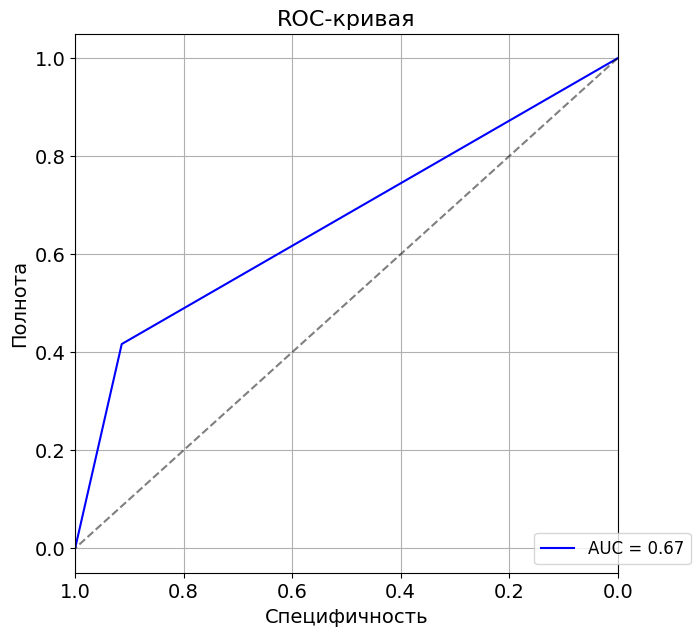

In [7]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))

plt.plot(1-fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [1, 0], color="black", linestyle="--", alpha=0.5)
plt.xlabel("Специфичность", fontsize=14)
plt.ylabel("Полнота", fontsize=14)
plt.xlim((1, 0))
plt.legend(loc="lower right", bbox_to_anchor=(1.15, 0), fontsize=12)
plt.grid(True)
plt.title("ROC-кривая", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

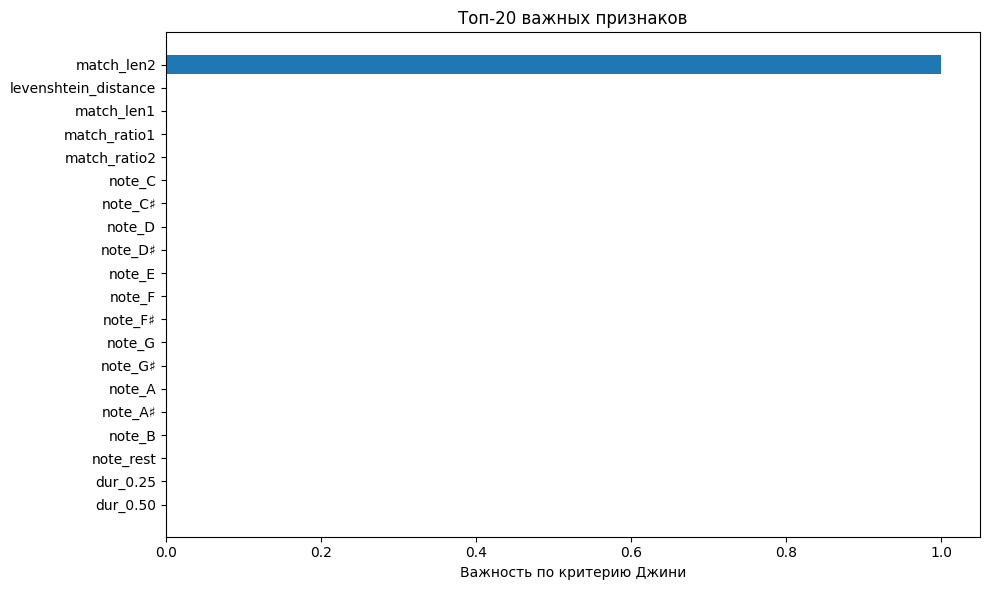

In [8]:
importance = np.abs(classifier.feature_importances_)
feature_importance = dict(zip(train_dataset.feature_names, importance))
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}

top_features = list(feature_importance.items())[:20]

plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in top_features], [f[1] for f in top_features])
plt.xlabel('Важность по критерию Джини')
plt.title('Топ-20 важных признаков')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

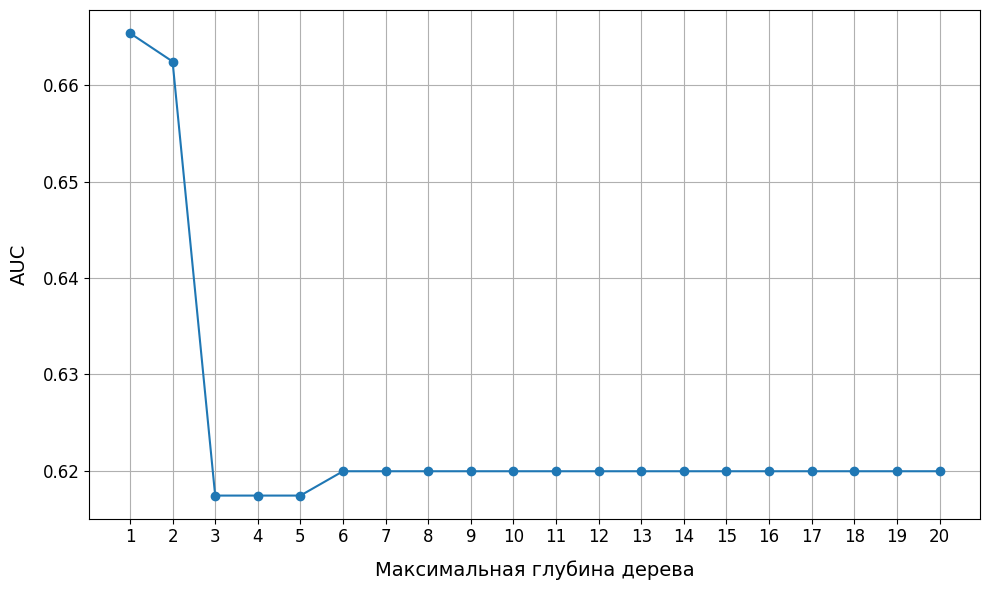

In [9]:
MAX_DEPTHS = range(1, 21)
depths = []
aucs = []

for max_depth in MAX_DEPTHS:
    classifier = DecisionTreeClassifier(class_weight='balanced', max_depth=max_depth, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    depths.append(max_depth)
    aucs.append(roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(depths, aucs, marker='o')
plt.xlabel('Максимальная глубина дерева', fontsize=14, labelpad=10)
plt.ylabel('AUC', fontsize=14, labelpad=10)
plt.grid(True)
plt.xticks(depths, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()